In [1]:
import matplotlib.pyplot as plt
from glob import glob 
import cv2
import random 
import os 
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Input , Dropout , Flatten , Conv2D
from tensorflow.keras.layers import BatchNormalization , Activation , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG , Image 
import tensorflow as tf
print ("Tensorflow version" , tf .__version__)


Tensorflow version 2.15.0


In [3]:
#Exploring dataset

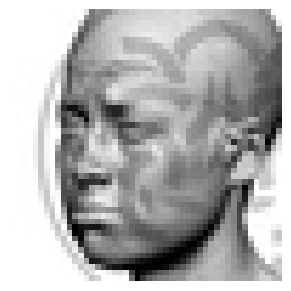

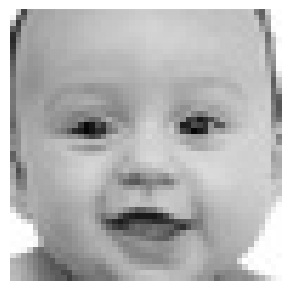

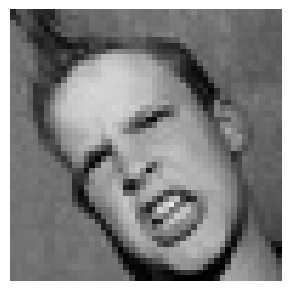

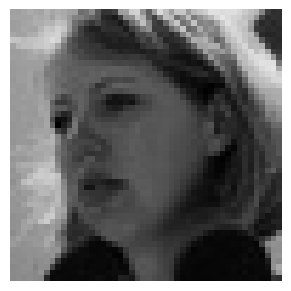

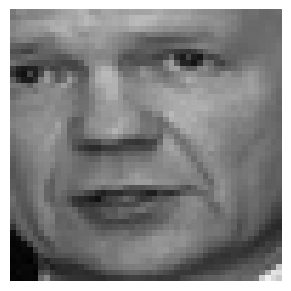

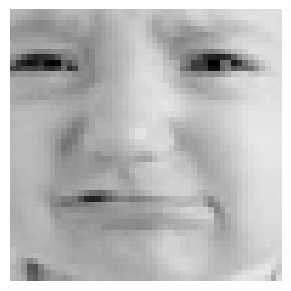

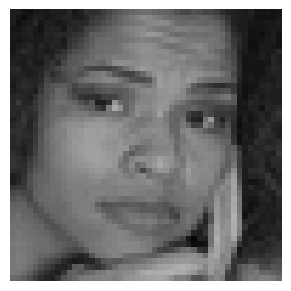

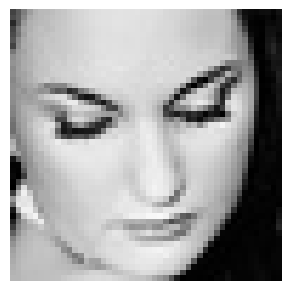

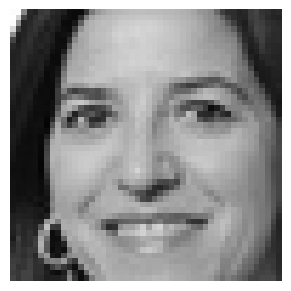

In [4]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize = (12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')
    

In [5]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", 
                                                    target_size = (img_size , img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28443 images belonging to 7 classes.


In [6]:
img_size = 48
batch_size = 64
datagen_validatio= ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/", 
                                                    target_size = (img_size , img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 7178 images belonging to 7 classes.


Defining model

In [7]:
def Convolution(input_tensor , filters , kernel_size ):
    x = Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [8]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x


In [9]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam' , metrics = ['accuracy'])
    return model
    


In [10]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0         
                                                                 
 flatten (Flatten)           (None, 73728)             0  

#Initialixing the model


In [11]:
epochs = 15 
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.h5",monitor = 'val_accuracy',save_weights_only = True, mode = 'max' , verbose =1)
callbacks = [checkpoint]

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.losses import categorical_crossentropy
import tensorflow

Training the model

In [ ]:
history = model.fit(
 x = train_generator,
 steps_per_epoch = steps_per_epoch,
 epochs = epochs,
 validation_data = validation_generator,
 validation_steps = validation_steps,
 callbacks = callbacks)



Epoch 1/15


174/444 [==========>...................] - ETA: 2:16 - loss: 1.8028 - accuracy: 0.3241

In [ ]:
Model Evaluation


In [ ]:
model.evaluate(validation_generator)

In [ ]:
#plotting loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model.Loss')
plt.legend(['Train','Validate'],loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom=0.0 , right = 0.95,left = 0.0 ,hspace = 0.25 , wspace = 0.35)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validate'],loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom=0.0 , right = 0.95,left = 0.0 ,hspace = 0.25 , wspace = 0.35)

In [ ]:
#Saving the model

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)